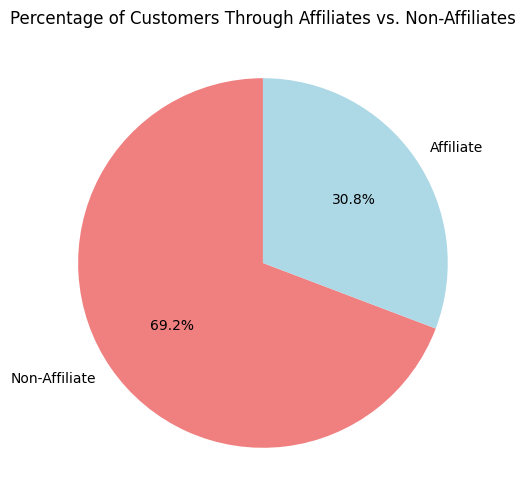

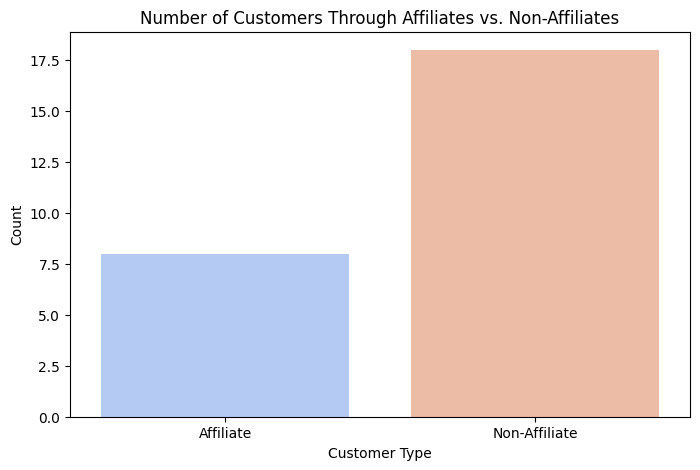

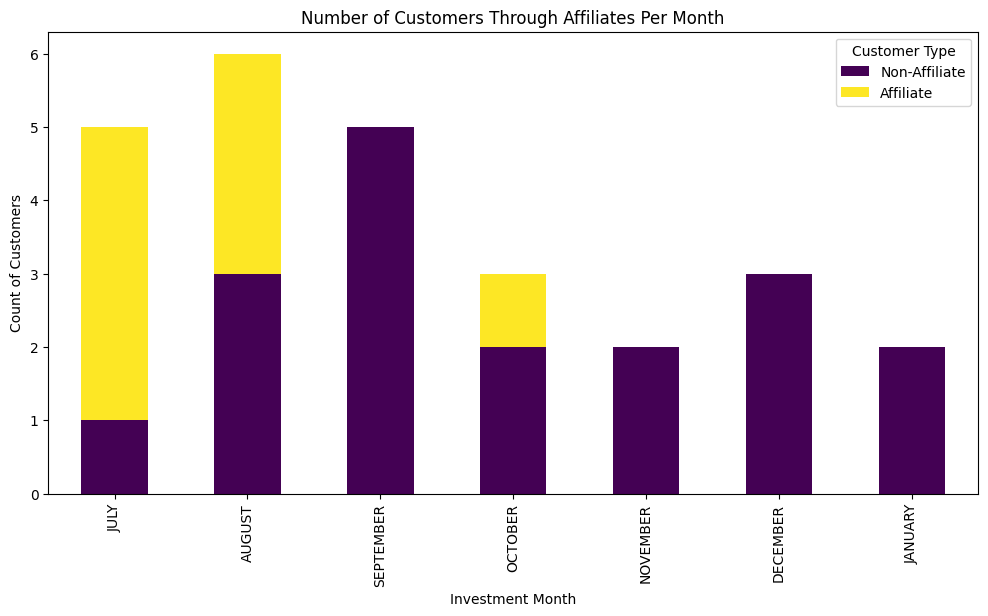

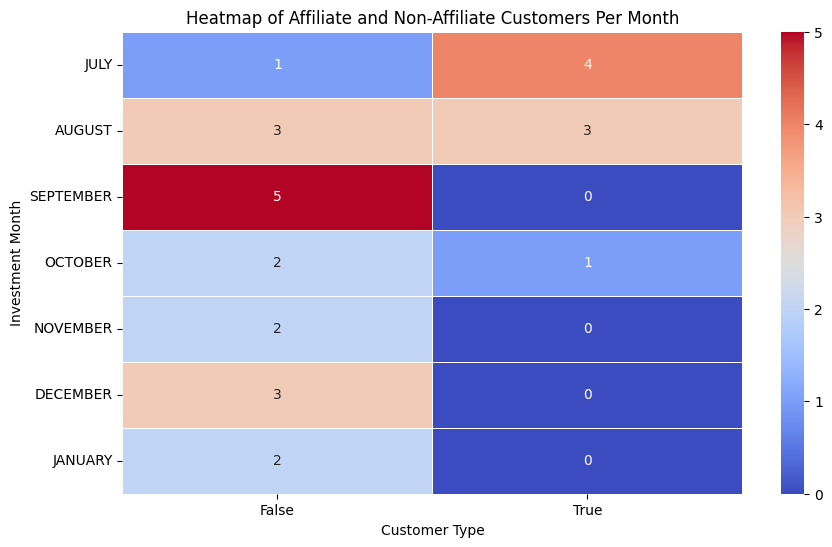

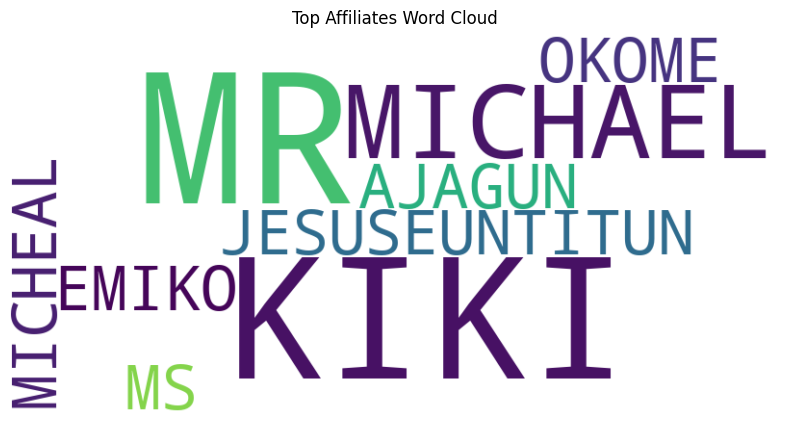

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the Excel file
file_path = "ROYAL PALM RECEIPT & PORTFOLIO (3).xlsx"
xls = pd.ExcelFile(file_path)

# Load the "PORTFOLIO" sheet
df = pd.read_excel(xls, sheet_name="PORTFOLIO")

# Select relevant columns
df = df[["S/N", "NAME", "INVESTMENT YEAR", "INVESTMENT MONTH", "AFFILIATE", "AFFILIATE 10%"]]

# Convert investment year to integer and filter relevant data
df = df.dropna(subset=["INVESTMENT YEAR", "INVESTMENT MONTH"])
df["INVESTMENT YEAR"] = df["INVESTMENT YEAR"].astype(int)
df = df[(df["INVESTMENT YEAR"] == 2024) | ((df["INVESTMENT YEAR"] == 2025) & (df["INVESTMENT MONTH"] == "JANUARY"))]

# Remove last two refunded/incomplete customers
df = df.iloc[:-2]

# Mark customers that came through affiliates (NIL means non-affiliate)
df["Came_Through_Affiliate"] = df["AFFILIATE"].apply(lambda x: x != "NIL")

# Define correct month order
month_order = ["JULY", "AUGUST", "SEPTEMBER", "OCTOBER", "NOVEMBER", "DECEMBER", "JANUARY"]
df["INVESTMENT MONTH"] = pd.Categorical(df["INVESTMENT MONTH"], categories=month_order, ordered=True)

# Cross-tabulation of affiliates by month
affiliate_by_month = pd.crosstab(df["INVESTMENT MONTH"], df["Came_Through_Affiliate"])

# Top affiliates by customer count
top_affiliates = df[df["AFFILIATE"] != "NIL"]["AFFILIATE"].value_counts().head(10)

# Visualization: Affiliate customer distribution (Pie Chart)
plt.figure(figsize=(6, 6))
df["Came_Through_Affiliate"].value_counts().plot.pie(autopct="%1.1f%%", labels=["Non-Affiliate", "Affiliate"], colors=["lightcoral", "lightblue"], startangle=90)
plt.title("Percentage of Customers Through Affiliates vs. Non-Affiliates")
plt.ylabel("")
plt.show()

# Visualization: Affiliate customer distribution (Bar Chart)
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Came_Through_Affiliate"].map({True: "Affiliate", False: "Non-Affiliate"}), hue=df["Came_Through_Affiliate"].map({True: "Affiliate", False: "Non-Affiliate"}), palette="coolwarm", legend=False)
plt.title("Number of Customers Through Affiliates vs. Non-Affiliates")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()

# Visualization: Affiliates by month (Ordered)
affiliate_by_month.loc[month_order].plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Number of Customers Through Affiliates Per Month")
plt.xlabel("Investment Month")
plt.ylabel("Count of Customers")
plt.legend(["Non-Affiliate", "Affiliate"], title="Customer Type")
plt.show()

# Visualization: Heatmap of Affiliates vs. Non-Affiliates by Month
plt.figure(figsize=(10, 6))
sns.heatmap(affiliate_by_month.loc[month_order], annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Affiliate and Non-Affiliate Customers Per Month")
plt.xlabel("Customer Type")
plt.ylabel("Investment Month")
plt.show()

# Visualization: Word cloud of top affiliates
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df["AFFILIATE"] != "NIL"]["AFFILIATE"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top Affiliates Word Cloud")
plt.show()

# Save cleaned data with affiliation status
df.to_excel("Cleaned_Affiliate_Report.xlsx", index=False)